<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Decision_Tree_PlayGolf_ID3_GINI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<small><small><i>
All the IPython Notebooks in this **Python Decision Tree and Random Forest** series by Dr. Milaan Parmar are available @ **[GitHub](https://github.com/milaan9/Python_Decision_Tree_and_Random_Forest)**
</i></small></small>

In [1]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=1WLIlxEiuRM4PTzs78e7Zv9c38hQF4Nj5")
print("\n Given Play Golf Dataset:\n\n", df)


 Given Play Golf Dataset:

      Outlook Temperature Humidity    Wind PlayGolf
0      Sunny         Hot     High    Weak       No
1      Sunny         Hot     High  Strong       No
2   Overcast         Hot     High    Weak      Yes
3      Rainy        Mild     High    Weak      Yes
4      Rainy        Cool   Normal    Weak      Yes
5      Rainy        Cool   Normal  Strong       No
6   Overcast        Cool   Normal  Strong      Yes
7      Sunny        Mild     High    Weak       No
8      Sunny        Cool   Normal    Weak      Yes
9      Rainy        Mild   Normal    Weak      Yes
10     Sunny        Mild   Normal  Strong      Yes
11  Overcast        Mild     High  Strong      Yes
12  Overcast         Hot   Normal    Weak      Yes
13     Rainy        Mild     High  Strong       No


---

## Building a Decision Tree using `scikit-learn`

In [2]:
# Importing the necessary module!

import numpy as np


In [3]:
df.dtypes

,0
Outlook,object
Temperature,object
Humidity,object
Wind,object
PlayGolf,object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [5]:
# Converting categorical variables into dummies/indicator variables

df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_getdummy

,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,False,True,False,True,False,False,False,True,False,True
1,No,False,True,False,True,False,False,False,True,True,False
2,Yes,False,True,False,True,False,True,False,False,False,True
3,Yes,False,False,True,True,False,False,True,False,False,True
4,Yes,True,False,False,False,True,False,True,False,False,True
5,No,True,False,False,False,True,False,True,False,True,False
6,Yes,True,False,False,False,True,True,False,False,True,False
7,No,False,False,True,True,False,False,False,True,False,True
8,Yes,True,False,False,False,True,False,False,True,False,True
9,Yes,False,False,True,False,True,False,True,False,False,True


In [6]:
# Separating the training set and test set

from sklearn.model_selection import train_test_split

X = df_getdummy.drop('PlayGolf',axis=1)
y = df_getdummy['PlayGolf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

X

,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,False,True,False,True,False,False,False,True,False,True
1,False,True,False,True,False,False,False,True,True,False
2,False,True,False,True,False,True,False,False,False,True
3,False,False,True,True,False,False,True,False,False,True
4,True,False,False,False,True,False,True,False,False,True
5,True,False,False,False,True,False,True,False,True,False
6,True,False,False,False,True,True,False,False,True,False
7,False,False,True,True,False,False,False,True,False,True
8,True,False,False,False,True,False,False,True,False,True
9,False,False,True,False,True,False,True,False,False,True


In [10]:
# importing Decision Tree Classifier via sklean

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=2)
dtree.fit(X,y)
predictions = dtree.predict(X_test)

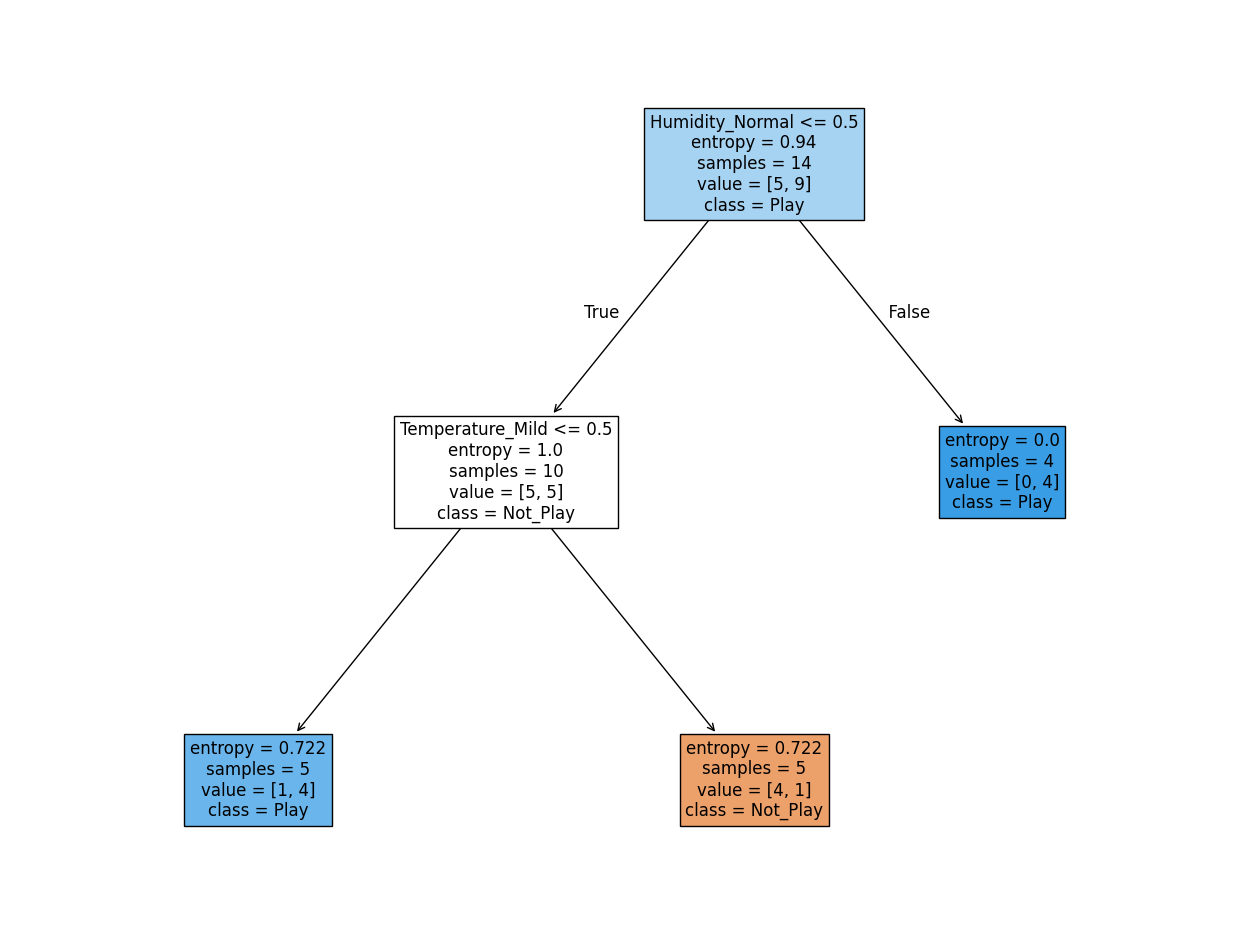

In [11]:
# visualising the decision tree diagram

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df_getdummy.columns, fontsize=12, filled=True,
              class_names=['Not_Play', 'Play'])

In order to improve the model performance (Hyperparameters Optimization), you should adjust the hyperparameters. For more details, please check out **[here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**.

The major disadvantage of Decision Trees is overfitting, especially when a tree is particularly deep. Fortunately, the more recent tree-based models including random forest and XGBoost are built on the top of decision tree algorithm and they generally perform better with a strong modeling technique and much more dynamic than a single decision tree. Therefore, understanding the concepts and algorithms behind Decision Trees thoroughly is super helpful to construct a good foundation of learning data science and machine learning.